<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.193300,84.971910,-0.009238,153.155972,153.164367,-0.008395
1,0.0,1.0,32.070973,74.447345,-0.002178,116.516140,116.519253,-0.003113
2,0.0,2.0,98.748676,51.762118,0.007828,160.518622,160.513397,0.005225
3,0.0,3.0,97.727379,98.700550,-0.003929,206.423999,206.424670,-0.000670
4,0.0,4.0,70.221551,46.490710,-0.002735,126.709526,126.716026,-0.006501
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.480623,45.541174,-0.003830,103.017966,103.019792,-0.001826
19996,999.0,16.0,85.624565,45.851141,-0.009115,141.466591,141.469778,-0.003188
19997,999.0,17.0,35.894605,48.109611,-0.007317,93.996899,94.003717,-0.006818
19998,999.0,18.0,67.220933,80.722047,0.005833,157.948813,157.943079,0.005733


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.193300,84.971910,-0.009238,153.155972,153.164367,-0.008395
1,0.0,1.0,32.070973,74.447345,-0.002178,116.516140,116.519253,-0.003113
2,0.0,2.0,98.748676,51.762118,0.007828,160.518622,160.513397,0.005225
3,0.0,3.0,97.727379,98.700550,-0.003929,206.423999,206.424670,-0.000670
4,0.0,4.0,70.221551,46.490710,-0.002735,126.709526,126.716026,-0.006501
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.480623,45.541174,-0.003830,103.017966,103.019792,-0.001826
19996,999.0,16.0,85.624565,45.851141,-0.009115,141.466591,141.469778,-0.003188
19997,999.0,17.0,35.894605,48.109611,-0.007317,93.996899,94.003717,-0.006818
19998,999.0,18.0,67.220933,80.722047,0.005833,157.948813,157.943079,0.005733


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.193300  84.971910 -0.009238  153.155972  153.164367 -0.008395
      1.0    32.070973  74.447345 -0.002178  116.516140  116.519253 -0.003113
      2.0    98.748676  51.762118  0.007828  160.518622  160.513397  0.005225
      3.0    97.727379  98.700550 -0.003929  206.423999  206.424670 -0.000670
      4.0    70.221551  46.490710 -0.002735  126.709526  126.716026 -0.006501
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.480623  45.541174 -0.003830  103.017966  103.019792 -0.001826
      16.0   85.624565  45.851141 -0.009115  141.466591  141.469778 -0.003188
      17.0   35.894605  48.109611 -0.007317   93.996899   94.003717 -0.006818
      18.0   67.220933  80.722047  0.005833  157.948813  157.943079  0.005733
      19.0   70.091134  22.254382 -0.039245  102.306272  102.338416 -0.032144

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.193300  84.971910 -0.009238  153.155972  153.164367 -0.008395
      1.0    32.070973  74.447345 -0.002178  116.516140  116.519253 -0.003113
      2.0    98.748676  51.762118  0.007828  160.518622  160.513397  0.005225
      3.0    97.727379  98.700550 -0.003929  206.423999  206.424670 -0.000670
      4.0    70.221551  46.490710 -0.002735  126.709526  126.716026 -0.006501
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.480623  45.541174 -0.003830  103.017966  103.019792 -0.001826
      16.0   85.624565  45.851141 -0.009115  141.466591  141.469778 -0.003188
      17.0   35.894605  48.109611 -0.007317   93.996899   94.003717 -0.006818
      18.0   67.220933  80.722047  0.005833  157.948813  157.943079  0.005733
      19.0   70.091134  22.254382 -0.039245  102.306272  102.338416 -0.032144

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.193300,84.971910,-0.009238,153.155972,153.164367,-0.008395
1,0.0,1.0,32.070973,74.447345,-0.002178,116.516140,116.519253,-0.003113
2,0.0,2.0,98.748676,51.762118,0.007828,160.518622,160.513397,0.005225
3,0.0,3.0,97.727379,98.700550,-0.003929,206.423999,206.424670,-0.000670
4,0.0,4.0,70.221551,46.490710,-0.002735,126.709526,126.716026,-0.006501
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,47.480623,45.541174,-0.003830,103.017966,103.019792,-0.001826
19996,999.0,16.0,85.624565,45.851141,-0.009115,141.466591,141.469778,-0.003188
19997,999.0,17.0,35.894605,48.109611,-0.007317,93.996899,94.003717,-0.006818
19998,999.0,18.0,67.220933,80.722047,0.005833,157.948813,157.943079,0.005733


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    58.193300  84.971910 -0.009238  153.155972  153.164367 -0.008395
      1.0    32.070973  74.447345 -0.002178  116.516140  116.519253 -0.003113
      2.0    98.748676  51.762118  0.007828  160.518622  160.513397  0.005225
      3.0    97.727379  98.700550 -0.003929  206.423999  206.424670 -0.000670
      4.0    70.221551  46.490710 -0.002735  126.709526  126.716026 -0.006501
...                ...        ...       ...         ...         ...       ...
999.0 15.0   47.480623  45.541174 -0.003830  103.017966  103.019792 -0.001826
      16.0   85.624565  45.851141 -0.009115  141.466591  141.469778 -0.003188
      17.0   35.894605  48.109611 -0.007317   93.996899   94.003717 -0.006818
      18.0   67.220933  80.722047  0.005833  157.948813  157.943079  0.005733
      19.0   70.091134  22.254382 -0.039245  102.306272  102.338416 -0.032144

[20000 rows x 6 columns]

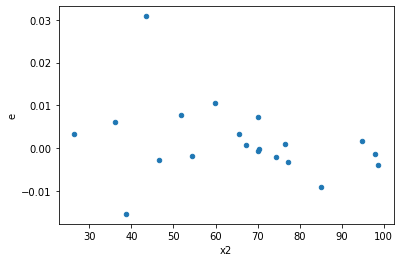

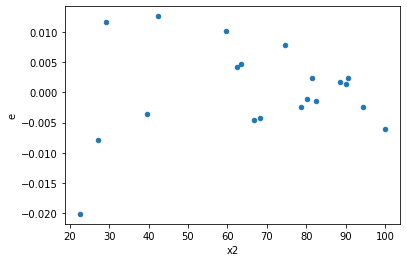

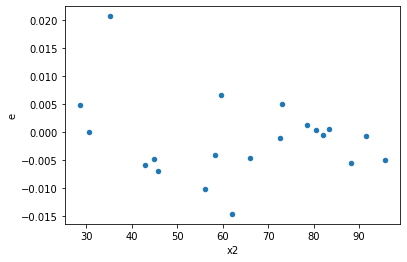

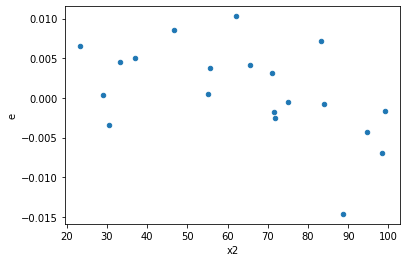

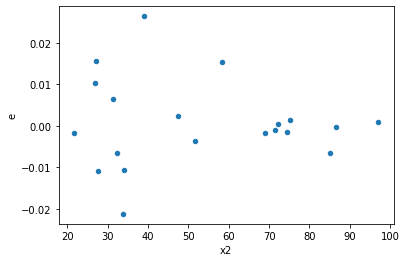

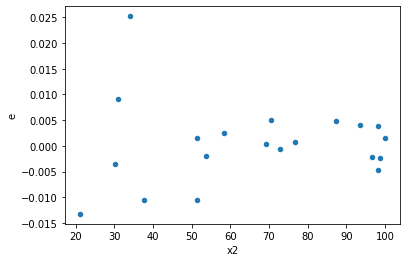

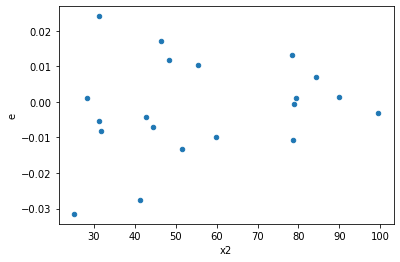

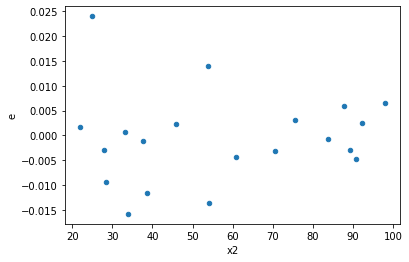

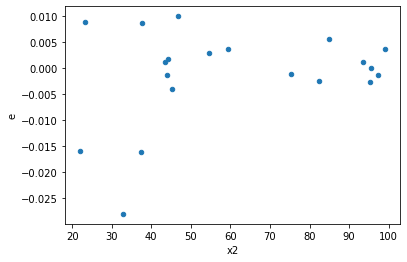

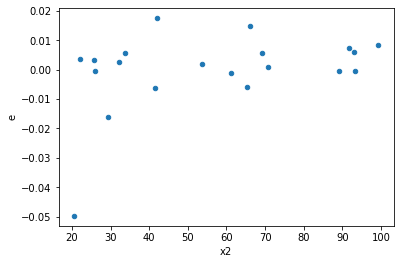

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,6.0,0.00018442941940501027,0.0002065899810364182,3.073823656750171e-05,3.44316635060697e-05,1.1201574114525783,0.8939639151791239,0.5530180424104381,0.44698195758956194,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,0.0005169140754417867,0.000655989779150293,8.615234590696445e-05,0.00010933162985838215,1.269049945273097,0.7797491752472037,0.6101254123763982,0.38987458762360183,Reject005=1 : Homoscedasticity
23.0,6.0,6.0,0.00031292251097133326,0.0005870956258522809,5.215375182855554e-05,9.784927097538015e-05,1.8761693558890833,0.4631708318505696,0.7684145840747152,0.2315854159252848,Reject005=1 : Homoscedasticity
32.0,6.0,6.0,0.00010400451025676966,0.00026482113647360324,1.7334085042794943e-05,4.4136856078933876e-05,2.5462466562248536,0.28016517941750063,0.8599174102912497,0.14008258970875032,Reject005=1 : Homoscedasticity
36.0,6.0,6.0,0.00016620805423724134,0.0001771318185205383,2.7701342372873556e-05,2.952196975342305e-05,1.0657234352055205,0.9403849025095661,0.529807548745217,0.47019245125478304,Reject005=1 : Homoscedasticity
40.0,6.0,6.0,0.0002158662646620998,0.00025021852497466185,3.5977710777016635e-05,4.170308749577698e-05,1.159136770937017,0.8623048712964256,0.5688475643517872,0.4311524356482128,Reject005=1 : Homoscedasticity
43.0,6.0,6.0,0.00018086241745463434,0.0002091031105396991,3.0143736242439057e-05,3.4850518423283184e-05,1.1561446180058297,0.864689429935118,0.567655285032441,0.432344714967559,Reject005=1 : Homoscedasticity
79.0,6.0,6.0,0.00011774262087484176,0.0002176281414348466,1.962377014580696e-05,3.627135690580776e-05,1.848337839075124,0.4737033918320861,0.763148304083957,0.23685169591604305,Reject005=1 : Homoscedasticity
82.0,6.0,6.0,0.0001497155331097573,0.00047040190955945007,2.4952588851626217e-05,7.840031825990834e-05,3.1419713091132353,0.1893704046801421,0.905314797659929,0.09468520234007105,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.0011193312438562582,7.17298398590391e-05,0.00018655520730937638,1.195497330983985e-05,0.06408276392957586,0.003983332367317149,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,0.0008119933215945396,8.457826533583073e-05,0.00013533222026575661,1.4096377555971788e-05,0.10416128197919342,0.014503841255627157,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,0.00018442941940501027,0.0002065899810364182,3.073823656750171e-05,3.44316635060697e-05,1.1201574114525783,0.8939639151791239,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.00016717632335497883,5.6908633765041516e-05,2.786272055916314e-05,9.484772294173587e-06,0.34041084660178145,0.21547259861019427,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,0.0006211948895047319,0.000418979358185068,0.00010353248158412197,6.982989303084467e-05,0.6744732857012284,0.6445697436867615,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,0.0007789544158462094,3.69549610163357e-05,0.00012982573597436823,6.159160169389284e-06,0.047441750460057476,0.0017343619550685278,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,0.0005169140754417867,0.000655989779150293,8.615234590696445e-05,0.00010933162985838215,1.269049945273097,0.7797491752472037,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,0.0006578806778562756,0.0001246848792538172,0.0001096467796427126,2.0780813208969535e-05,0.1895250665517442,0.06279202874416472,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,0.00035574967586540524,3.919875660128812e-05,5.9291612644234204e-05,6.533126100214686e-06,0.11018634523259165,0.016758077493369692,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      601
Reject005=0 : Heteroscedasticity    399
Name: Result_test, dtype: int64